## Discussion #12

Required files = `sleep75.dta`, `wage1.dta`

OH: Mondays and Wednesdays 9:15-10:15am in 6473 Sewell Social Sciences

Email: minnie.cui@wisc.edu

**Reminder:** Coding practice 5 is uploaded!

#### Common mistakes on Exam 2

- Question 1
    - Some didn’t get rid of header inducing errors. 
    - Some didn’t know how to adjust the monthly data to quarterly.

- Question 2 
    - Misunderstand the question as multiplying the value with 2, 3, 4. 
    - Due to the failure of dropping the header, some were unable to use the function. The value’s type was str, instead of int.

- Question 3 
    - Same header problem. 
    - When using this code, `df = df[~df['State'].isin(not_contiguous)]`, some forgot to add the `~`. 
    - Some didn’t set the index as `state` and had no idea how to drop the non-contiguous states.
    - When sorting indexes, not setting the ascending = False.
      
- Question 4
    - Had no idea how to deal with the column’s value in order to successfully merge two dataframes. 
    - pd.merge(left=epa, right=geo, left_on = 'State',right_on = 'NAME'). **GEO DATA MUST BE THE LEFT DATA SET.**
    - Forgot to assign value to the columns in the plot function. 
    - Many didn’t try to solve the log scale graph drawing problems. 

- Question 5 
    - Shouldn't have 50 lines on a single line plot!

### This week we saw:
- OLS
- Difference-in-differences analysis
- Discrete regressions

## Regressions

The `statsmodels` package (with [documentation](https://devdocs.io/statsmodels/)) provides functions for statistical models. We won't dive into what makes the models work but instead we'll just see how to use them in python.

Stata is great for econometrics, but Python is more flexible in a number of ways. Stata has some niced canned routines that aren't available in python, but generally flexibility is better. Check out this [page](http://rlhick.people.wm.edu/posts/comparing-stata-and-ipython-commands-for-ols-models.html) on Rob Hicks' website for a STATA-to-python concordance.

In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting


# The new package
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

### Read in Data

Jeff Wooldridge has some amazing econometrics textbooks. We'll work through some of the examples to introduce regression in python. The data is available and very clean! We'll start out with some sleep data.

In [2]:
# Read sleep data
sleep = pd.read_stata('sleep75.dta')
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1.0,3529.0,...,0.0,3438.0,0.0,3438.0,0.0,14.0,0.0,13.0,7.070004,1024.0
1,31.0,0.0,2.0,0.0,0.0,14.0,9500.0,1.0,1.0,2140.0,...,0.0,5020.0,0.0,5020.0,0.0,11.0,0.0,0.0,1.429999,961.0
2,44.0,0.0,3.0,0.0,0.0,17.0,42500.0,1.0,1.0,4595.0,...,1.0,2815.0,0.0,2815.0,0.0,21.0,0.0,0.0,20.530001,1936.0
3,30.0,0.0,4.0,0.0,0.0,12.0,42500.0,1.0,1.0,3211.0,...,1.0,3786.0,0.0,3786.0,0.0,12.0,0.0,12.0,9.619998,900.0
4,64.0,0.0,5.0,0.0,0.0,14.0,2500.0,1.0,1.0,4052.0,...,1.0,2580.0,0.0,2580.0,0.0,44.0,0.0,33.0,2.750000,4096.0


In [3]:
sleep.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.00000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815865,0.049575,353.500000,0.182331,0.030075,12.780454,9767.705078,0.890935,0.753541,4690.723633,...,0.48017,2122.920654,0.218130,2093.252197,29.668554,20.035410,0.128895,11.769122,5.082839,1635.144531
std,11.342639,0.217220,203.948349,0.335413,0.148366,2.784701,9323.587891,0.311941,0.431255,908.049561,...,0.49996,947.470154,0.413271,945.301331,148.833649,12.377521,0.335322,11.591234,3.704384,950.103149
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.00000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,2.890002,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.00000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,4.379999,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.00000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,6.210001,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.00000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509991,4225.000000


In [6]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    float32
 1   black     706 non-null    float32
 2   case      706 non-null    float32
 3   clerical  706 non-null    float32
 4   construc  706 non-null    float32
 5   educ      706 non-null    float32
 6   earns74   706 non-null    float32
 7   gdhlth    706 non-null    float32
 8   inlf      706 non-null    float32
 9   leis1     706 non-null    float32
 10  leis2     706 non-null    float32
 11  leis3     706 non-null    float32
 12  smsa      706 non-null    float32
 13  lhrwage   532 non-null    float32
 14  lothinc   706 non-null    float32
 15  male      706 non-null    float32
 16  marr      706 non-null    float32
 17  prot      706 non-null    float32
 18  rlxall    706 non-null    float32
 19  selfe     706 non-null    float32
 20  sleep     706 non-null    float3

### Models via `formula.api`

Let's consider a linear regression:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon,$$

Here, $y$, $x_1$, and $x_2$ are variables, $\beta_0, \beta_1$, and $\beta_2$ are the parameters to estimate, and $\epsilon$ is the error term. 

The `statsmodels` package provides a formulaic syntax for defining models that uses strings. The basic syntax is
```
y ~ x1 + x2
```
which describes the model above. Notice that I did not specify the constant. `statsmodels` takes care of that automatically. If you've seen regressions in R, this is very familiar. This would be equivalent to `reg y x1 x2` in Stata.

The work flow is:
1. Specify the regression: sort out the dependent and independent variables
2. Create the model with statsmodel
3. Fit the model and obtain results

We'll use the `statsmodels.formula.api` methods, which we imported as `smf`. 

### 1. Specify the regression

How do hours of sleep vary with working? Do we trade off sleep for work? We control for education and age.

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 age + \epsilon. $$

This is in Problem 3, Chapter 3 in Wooldridge, for reference.

### 2. Create the model

Using the `statsmodel` syntax, we have :

```python
sleep ~ totwrk + educ + age
```

Remember, the constant is automatically added. 

We use the `.ols()` method of statsmodels. This is the *ordinary least squares* model. 

In [7]:
# Specify model
sleep_model = smf.ols('sleep ~ totwrk + educ + age', data=sleep)
type(sleep_model)

statsmodels.regression.linear_model.OLS

The `model.OLS` object has information on the regression model:

* sleep_model.exog_names
* sleep_model.endog_names
* sleep_model.nobs

Check the documentation or try `sleep_model.` and then `TAB`. 

In [8]:
# Exogenous (RHS) variables
sleep_model.exog_names

['Intercept', 'totwrk', 'educ', 'age']

### 3. Estimate the Model

Step 2 set up the model but did not estimate the coefficients. Use the `.fit()` method of the OLS model object to estimate the coefficients. 

In [9]:
results = sleep_model.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

Yet another object! This time, a `RegressionResultsWrapper`. This object hold all the, well, results. Try `results.` and `TAB` again to see what lives in there.

In [10]:
print(results.summary())



#creae a scatter plot to along with table
#plot of residual 

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.28e-18
Time:                        12:15:42   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

Putting it all together...

In [11]:
print(smf.ols('sleep ~ totwrk + educ + age', data=sleep).fit().summary())     #use this 3 in 1 step!

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.28e-18
Time:                        12:18:33   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

In [12]:
# An example: Let's see how log wages vary with education.
# Create a variable for log wages. [Hint: use .apply or .map]
# Create a plot of log wages against education
# Regress log wages on education and a constant

# Read in the data
wages = pd.read_stata('wage1.dta')
wages['log_wage'] = wages['wage'].map(np.log)
wages.head()



#with dollar values - log transform (coefficient as percentage changes)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,log_wage
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0,1.131402
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0,1.175573
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0,1.098612
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0,1.791759
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0,1.667707


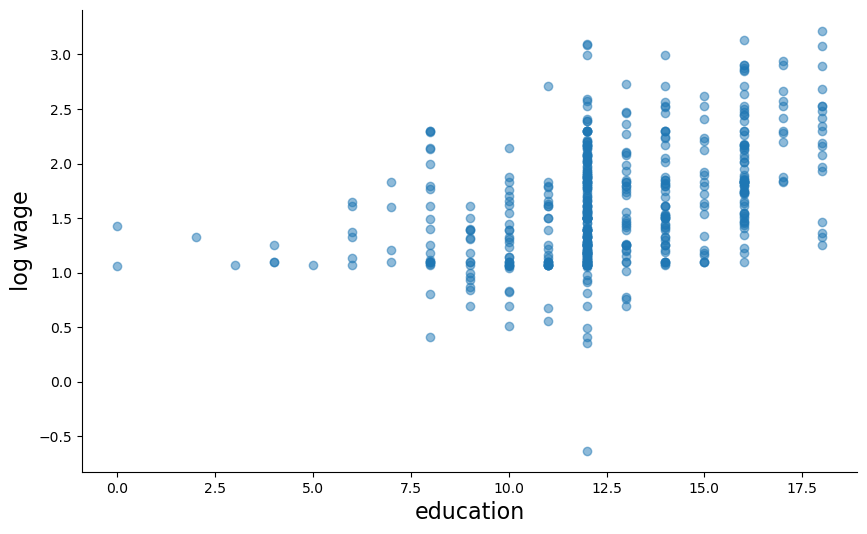

In [13]:
# Create plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(wages['educ'], wages['log_wage'], marker='o', alpha = 0.5)

# Set labels
ax.set_xlabel('education', fontsize=16)
ax.set_ylabel('log wage', fontsize=16)

# De-spine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Save image
plt.savefig('lwage_edu.svg')
plt.savefig('lwage_edu.png')





#genral upward trend, more edu, higher edu (coed on edu varibale is positive)
# then run a regression to show the significance 

In [14]:
# log wages on education
print(smf.ols("log_wage ~ educ", data=wages).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.27e-25
Time:                        12:20:29   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

## Even more project tips...

After estimating a regression, you can export them directly to Latex! No need to format the tables yourselves. Try running the code below.

In [15]:
print(results.summary().as_latex())


#latex format

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      sleep       & \textbf{  R-squared:         } &     0.113   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.110   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     29.92   \\
\textbf{Date:}             & Fri, 19 Apr 2024 & \textbf{  Prob (F-statistic):} &  3.28e-18   \\
\textbf{Time:}             &     12:21:52     & \textbf{  Log-Likelihood:    } &   -5263.1   \\
\textbf{No. Observations:} &         706      & \textbf{  AIC:               } & 1.053e+04   \\
\textbf{Df Residuals:}     &         702      & \textbf{  BIC:               } & 1.055e+04   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \t

## Optimization

We'll talk about *optimization* today. Much of economics is related to optimization: we like to think that consumers and producers act optimally subject to some constraints (in some cases, a budget constraint).

There's a lot to know about optimization and it's widely applicable across a number of fields, not just economics. It's used often in computer science, statistics, mathematics, and engineering. 

The bonus notebook contains some problems and examples that are common in economics. Today, we'll revisit an advanced problem we saw in CP2 and go over what it means to optimize, and how to dissect a problem into something you can tackle with the tools you've learned in this class.

### Revisiting an optimization problem from CP2

*Source:* This is a modification of a problem that Google often uses as a coding exam to recruit software engineers.

*Setup:* You are going to lead a team of analysts to summarize the determinants of health spending growth 1960-2019. Each team member will be responsible for a set of consecutive years to generate a report for the Biden administration. It's expensive to hire an analyst: each one receives a base salary of $\$50,000$, plus a bonus of $\$8,000$ per week of work. It is expected that if an analyst is given `Y` years of data to analyze, it will take her $$Y + 0.075*Y^2$$ weeks to complete the project. 

*How to assign years:* Each analyst will receive a "cut" of consecutive years to analyze. For example, if there are 6 team members, each team member will get a decade to analyze: 1960-1969, 1970-1979, 1980-1989, 1990-1999, 2000-2009, and 2010-2019. However, if there are 7 team members, you can't divide the years equally. This means you can't have a team of 7.

*Your task:* You don’t know how many teammates you’ll have, but you’re told there is a total pool of 10 analysts, including you, and you are expected to hire at least 4 of them. Your job is to find the number of analysts that has the lowest cost. For example, if there are 4 team members, each of whom is responsible for 15 years, the total cost is $4 \times (\$50,000 + \$8,000 \times (15 + 0.075 \times 15^2)) = \$1,220,000$. Not bad for a federal project!

In [31]:
# Exercise: How should we break down this problem?

# create list of years

years = list(range(1960, 2020))
nyears = len(years)

team_sizes = []
costs = []

# loop over team sizes
for team_size in range(4,11):
    if nyears % team_size == 0:
        years_per_analyst = nyears / team_size
        nweeks = years_per_analyst + 0.075 * years_per_analyst**2
        total_cost = team_size*(50000+8000 * nweeks)
        team_sizes.append(team_size)
        costs.append(total_cost)
        print(min(team_sizes))

4
4
4
4


In [ ]:
#minimum cost
min_index = costs.index(min(costs))
min_index

## Have a great weekend!